<a href="https://colab.research.google.com/github/wanessaneves/Projetos-DataAnalytics/blob/main/CaseCosmeticosipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Desafio 1 : Cosméticos

***Suponha que você trabalha em uma empresa do ramo de cosméticos ou beleza. O
Time de produtos dessa empresa está interessado criar novos batons com maior
durabilidade. Para isso estão testando 3 diferentes fórmulas para irem a mercado.***

Com isso, a empresa fez uma pesquisa com varias voluntárias e populou a base de
dados (desafio_01_cosmeticos.csv) contendo as seguintes informacoes:

● id_produto: código identificador do produto, com a fórmula utilizada. Para
diferenciarmos se se trata do batom com a fórmula 1, 2 ou 3

● id_voluntária: código identificador da voluntária que utilizou o produto.

● durabilidade: quanto tempo o produto durou em horas.

● idade: idade da voluntária

● exposicao_sol: variável que indica 1 se a voluntária se expos ao sol 0 caso
contrário.

De posse dessas informacoes, o time de produtos solicitou aos analistas de dados da
empresa as seguintes perguntas a serem respondidas:

1 - Existe diferenca estatisticamente significativa na durabilidade dos batons com
formulas diferentes?

2 - Essa diferenca persiste ou nao quando a voluntária se expoe ao sol? E com
relacao a idade?

3- Qual fórmula de batom voce indicaria para consumidores que buscam maior
durabilidade e exposicao ao sol?

In [ ]:
#ImportandoBibliotecas

import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.stats.weightstats as test_t
import numpy as np
import statsmodels.api as sm




In [ ]:
dados = pd.read_csv('/content/desafio_01_cosmeticos_challenge_testehipoteses230206120450-230911-094933.csv')

In [ ]:
dados.head()

,id_produto,id_voluntária,durabilidade,idade,exposicao_sol
0,1,1,12,40,1
1,2,2,5,36,0
2,1,3,19,47,0
3,1,4,14,36,1
4,1,5,17,46,1


In [ ]:
dados.shape[0]

300

In [ ]:
dados.describe()

,id_produto,id_voluntária,durabilidade,idade,exposicao_sol
count,300.000000,300.000000,300.000000,300.000000,300.000000
mean,2.000000,150.500000,17.133333,36.886667,0.440000
std,0.817861,86.746758,10.942945,12.625841,0.497216
min,1.000000,1.000000,5.000000,18.000000,0.000000
25%,1.000000,75.750000,9.000000,26.000000,0.000000
50%,2.000000,150.500000,14.000000,36.000000,0.000000
75%,3.000000,225.250000,20.000000,48.000000,1.000000
max,3.000000,300.000000,48.000000,60.000000,1.000000


In [ ]:
dados['id_produto'].unique()

array([1, 2, 3])

###1 - Existe diferença estatisticamente significativa na durabilidade dos batons com formulas diferentes?

###Formulação das hipóteses:

HO = NÃO HÁ DIFERENÇA ENTRE A DURABILIDADE QUANTO AS FÓRMULAS

H1 = HÁ DIFERENÇA QUANTO A DURABILIDADE ENTRE AS FÓRMULAS

In [ ]:
#analisando a média e o desvio padrão da formula-1
formula1 = dados.groupby(dados.query('id_produto == 1').id_produto)
media1 = formula1['durabilidade'].mean()
desvio1 = formula1['durabilidade'].std()
print('média: ', media1[1],'|', 'desvio padrão: ', desvio1[1].round(2))





média:  15.11 | desvio padrão:  3.28


In [ ]:
#analisando a formula-1 com exposição ao sol

formula1 = dados.groupby(dados.query('id_produto == 1 and exposicao_sol == 1').id_produto)
media1 = formula1['durabilidade'].mean()
desvio1 = formula1['durabilidade'].std()
print('média: ', media1[1].round(2),'|', 'desvio padrão: ', desvio1[1].round(2))

média:  11.91 | desvio padrão:  1.58


In [ ]:
#analisando a formula-1 sem exposição ao sol

formula1 = dados.groupby(dados.query('id_produto == 1 and exposicao_sol == 0').id_produto)
media1 = formula1['durabilidade'].mean()
desvio1 = formula1['durabilidade'].std()
print('média: ', media1[1].round(2),'|', 'desvio padrão: ', desvio1[1].round(2))

média:  17.73 | desvio padrão:  1.5


___

In [ ]:
#analisando a formula-2
formula2 = dados.groupby(dados.query('id_produto == 2').id_produto)
media2 = formula2['durabilidade'].mean()
desvio2 = formula2['durabilidade'].std()
print('média: ', media2[2],'|', 'desvio padrão: ', desvio2[2].round(2))


média:  7.77 | desvio padrão:  1.94


In [ ]:
#analisando a formula-2 com exposição ao sol
formula2 = dados.groupby(dados.query('id_produto == 2 and exposicao_sol==1').id_produto)
media2 = formula2['durabilidade'].mean()
desvio2 = formula2['durabilidade'].std()
print('média: ', media2[2].round(2),'|', 'desvio padrão: ', desvio2[2].round(2))


média:  7.56 | desvio padrão:  1.81


In [ ]:
#analisando a formula-2 sem exposição ao sol
formula2 = dados.groupby(dados.query('id_produto == 2 and exposicao_sol==0').id_produto)
media2 = formula2['durabilidade'].mean()
desvio2 = formula2['durabilidade'].std()
print('média: ', media2[2].round(2),'|', 'desvio padrão: ', desvio2[2].round(2))

média:  7.96 | desvio padrão:  2.06


---

In [ ]:
#analisando a média e o desvio padrão da formula-3
formula3 = dados.groupby(dados.query('id_produto == 3').id_produto)
media3 = formula3['durabilidade'].mean()
desvio3 = formula3['durabilidade'].std()
print('média: ', media3[3],'|', 'desvio padrão: ', desvio3[3].round(2))

média:  28.52 | desvio padrão:  11.11


In [ ]:
#analisando a formula-3 com exposição ao sol
formula3 = dados.groupby(dados.query('id_produto == 3 and exposicao_sol==1').id_produto)
media3 = formula3['durabilidade'].mean()
desvio3 = formula3['durabilidade'].std()
print('média: ', media3[3].round(2),'|', 'desvio padrão: ', desvio3[3].round(2))

média:  20.1 | desvio padrão:  8.47


In [ ]:
#analisando a formula-3 sem exposição ao sol
formula3 = dados.groupby(dados.query('id_produto == 3 and exposicao_sol==0').id_produto)
media3 = formula3['durabilidade'].mean()
desvio3 = formula3['durabilidade'].std()
print('média: ', media3[3].round(2),'|', 'desvio padrão: ', desvio3[3].round(2))

média:  33.9 | desvio padrão:  9.1


In [ ]:
statistic, p_valor = stats.normaltest(dados.durabilidade)
print(statistic.round(2), p_valor.round(2))

57.36 0.0


In [ ]:
significancia = 0.05


In [ ]:
p_valor <= significancia

True

Portanto não possui distribuição normal



##Aplicando a Análise Exploratória##

In [ ]:
dados.shape

(300, 5)

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   id_produto     300 non-null    int64
 1   id_voluntária  300 non-null    int64
 2   durabilidade   300 non-null    int64
 3   idade          300 non-null    int64
 4   exposicao_sol  300 non-null    int64
dtypes: int64(5)
memory usage: 11.8 KB


In [ ]:
dados.describe().T

,count,mean,std,min,25%,50%,75%,max
id_produto,300.0,2.000000,0.817861,1.0,1.00,2.0,3.00,3.0
id_voluntária,300.0,150.500000,86.746758,1.0,75.75,150.5,225.25,300.0
durabilidade,300.0,17.133333,10.942945,5.0,9.00,14.0,20.00,48.0
idade,300.0,36.886667,12.625841,18.0,26.00,36.0,48.00,60.0
exposicao_sol,300.0,0.440000,0.497216,0.0,0.00,0.0,1.00,1.0


In [ ]:
print(formula1['durabilidade'].quantile(q=0.75) - formula1['durabilidade'].quantile(q=0.25))

id_produto
1.0    2.0
Name: durabilidade, dtype: float64


In [ ]:
print(formula2['durabilidade'].quantile(q=0.75) - formula2['durabilidade'].quantile(q=0.25) )

id_produto
2.0    3.0
Name: durabilidade, dtype: float64


In [ ]:
print(formula3['durabilidade'].quantile(q=0.75) - formula3['durabilidade'].quantile(q=0.25) )

id_produto
3.0    14.0
Name: durabilidade, dtype: float64


###Gerando os bloxplot's dos diferentes tipos de fórmulas com a condição de se expor ao sol ou não

In [ ]:
#Fórmula 1 com exposição ao sol
dados_1 = dados.query('id_produto == 1 and exposicao_sol==1')



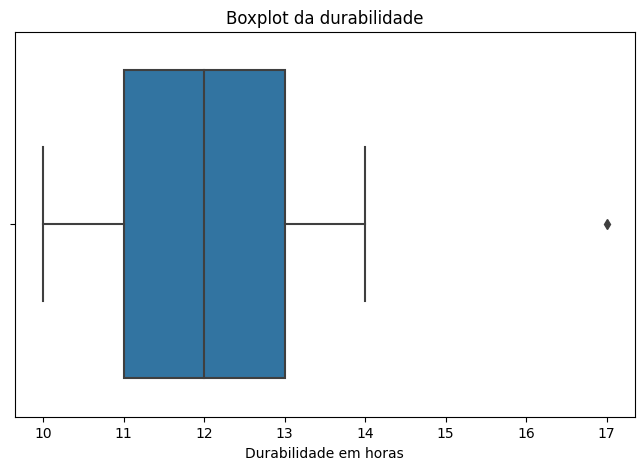

In [ ]:
#Plotando BoxPlot da fórmula 1 com exposição ao sol

plt.figure(figsize=(8, 5))
sns.boxplot(data=dados_1, x='durabilidade')
plt.title("Boxplot da durabilidade")
plt.xlabel("Durabilidade em horas")
plt.show()

In [ ]:
#Fórmula 1 sem exposição ao sol
dados_2 = dados.query('id_produto == 1 and exposicao_sol==0')


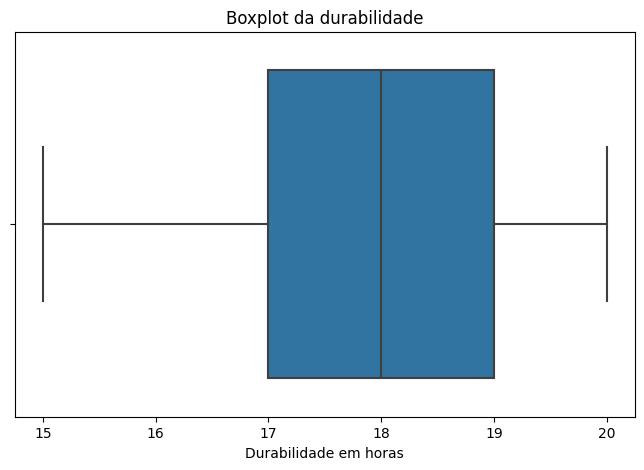

In [ ]:
#Plotando BoxPlot da fórmula 1 sem exposição ao sol

plt.figure(figsize=(8, 5))
sns.boxplot(data=dados_2, x='durabilidade')
plt.title("Boxplot da durabilidade")
plt.xlabel("Durabilidade em horas")
plt.show()

In [ ]:
#Fórmula 2 com exposição ao sol
dados_3 = dados.query('id_produto == 2 and exposicao_sol==1')


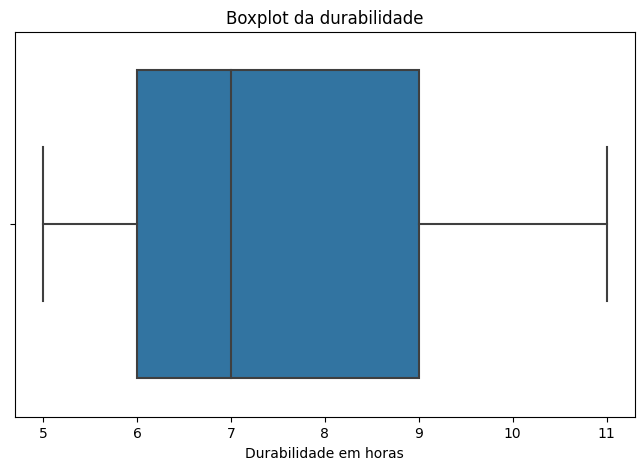

In [ ]:
#Plotando BoxPlot da fórmula 2 com exposição ao sol

plt.figure(figsize=(8, 5))
sns.boxplot(data=dados_3, x='durabilidade')
plt.title("Boxplot da durabilidade")
plt.xlabel("Durabilidade em horas")
plt.show()

In [ ]:
#Fórmula 2 sem exposição ao sol
dados_4 = dados.query('id_produto == 2 and exposicao_sol==0')


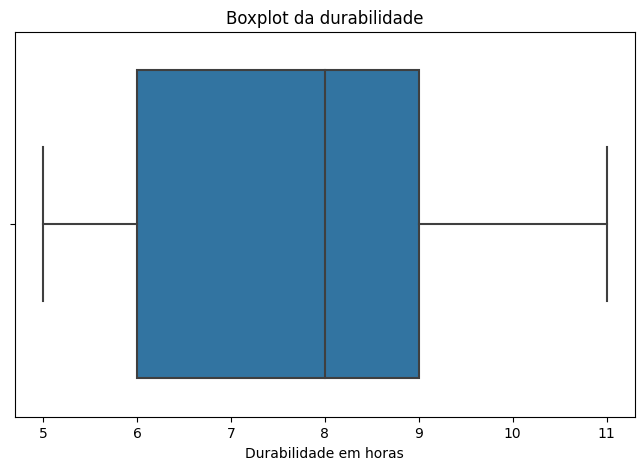

In [ ]:
#Plotando BoxPlot da fórmula 2 sem exposição ao sol

plt.figure(figsize=(8, 5))
sns.boxplot(data=dados_4, x='durabilidade')
plt.title("Boxplot da durabilidade")
plt.xlabel("Durabilidade em horas")
plt.show()

In [ ]:
#Fórmula 3 com exposição ao sol
dados_5 = dados.query('id_produto == 3 and exposicao_sol==1')


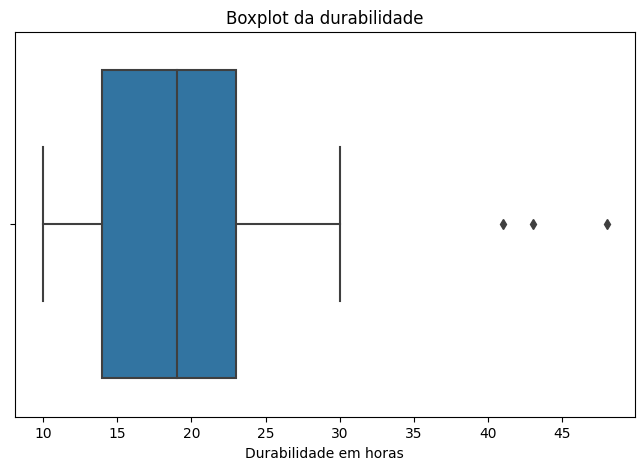

In [ ]:
#Plotando BoxPlot da fórmula 3 com exposição ao sol

plt.figure(figsize=(8, 5))
sns.boxplot(data=dados_5, x='durabilidade')
plt.title("Boxplot da durabilidade")
plt.xlabel("Durabilidade em horas")
plt.show()

In [ ]:
#Fórmula 3 sem exposição ao sol
dados_6 = dados.query('id_produto == 3 and exposicao_sol==0')


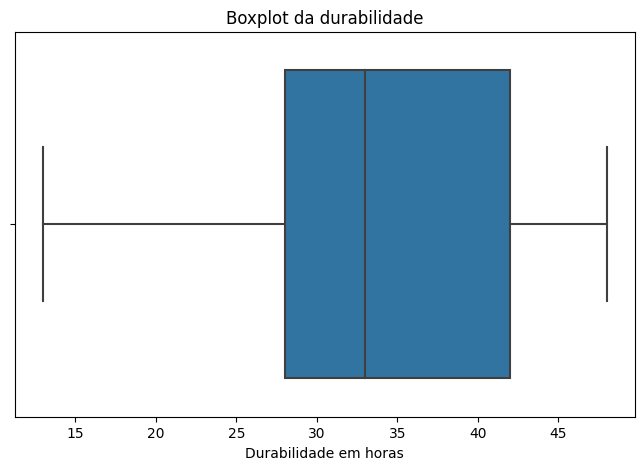

In [ ]:
#Plotando BoxPlot da fórmula 3 sem exposição ao sol

plt.figure(figsize=(8, 5))
sns.boxplot(data=dados_6, x='durabilidade')
plt.title("Boxplot da durabilidade")
plt.xlabel("Durabilidade em horas")
plt.show()

###Calculando a assimetria

In [ ]:
print(formula1['durabilidade'].skew())

id_produto
1.0   -0.338176
Name: durabilidade, dtype: float64


In [ ]:
print(formula2['durabilidade'].skew())

id_produto
2.0   -0.01658
Name: durabilidade, dtype: float64


In [ ]:
print(formula3['durabilidade'].skew())

id_produto
3.0   -0.30122
Name: durabilidade, dtype: float64


In [ ]:
dados.corr()

,id_produto,id_voluntária,durabilidade,idade,exposicao_sol
id_produto,1.000000,0.297458,0.501123,-0.160646,-0.049346
id_voluntária,0.297458,1.000000,0.197301,-0.067143,-0.040942
durabilidade,0.501123,0.197301,1.000000,-0.355607,-0.355654
idade,-0.160646,-0.067143,-0.355607,1.000000,0.165131
exposicao_sol,-0.049346,-0.040942,-0.355654,0.165131,1.000000


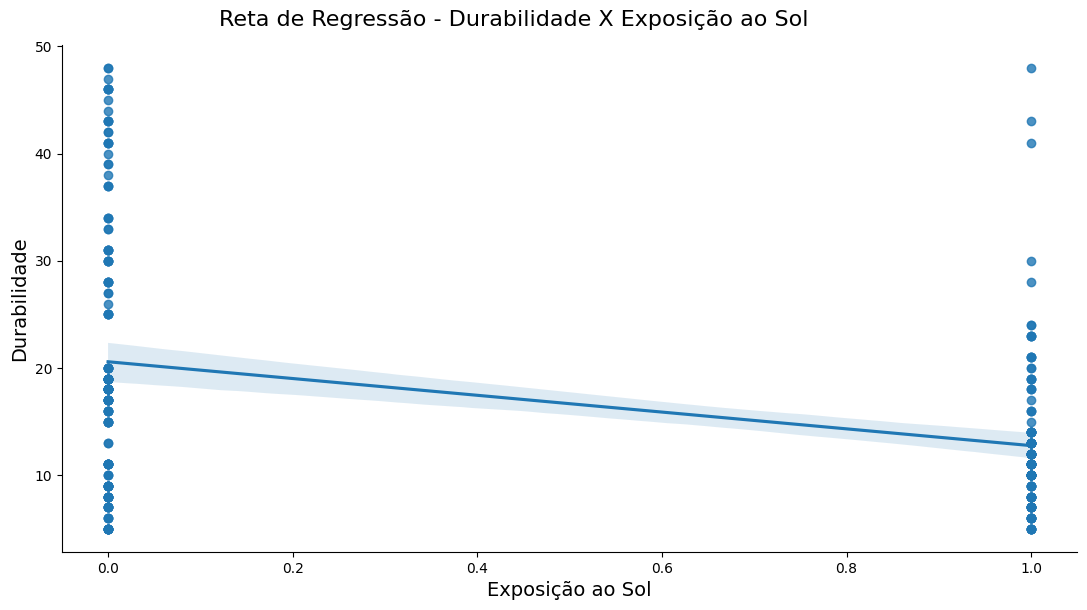

In [ ]:
ax = sns.lmplot(x="exposicao_sol", y="durabilidade", data=dados)
ax.fig.set_size_inches(12, 6)
ax.fig.suptitle('Reta de Regressão - Durabilidade X Exposição ao Sol', fontsize=16, y=1.02)
ax.set_xlabels("Exposição ao Sol", fontsize=14)
ax.set_ylabels("Durabilidade", fontsize=14)
ax

###2 - Essa diferença persiste ou nao quando a voluntária se expoe ao sol? E com relacao a idade?###

In [ ]:
dados_idade = dados[['durabilidade', 'idade']]
dados_idade

,durabilidade,idade
0,12,40
1,5,36
2,19,47
3,14,36
4,17,46
...,...,...
295,18,52
296,30,19
297,43,23
298,41,19


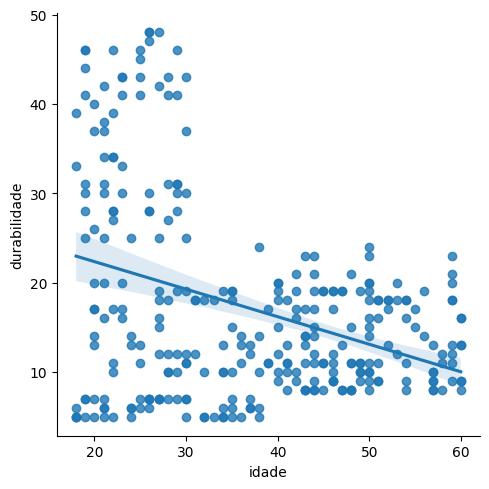

In [ ]:
sns.lmplot(x ='idade', y ='durabilidade', data = dados_idade,)


In [ ]:
resumo_durabilidade = dados.groupby(['id_produto', 'idade'])['durabilidade'].sum().reset_index()
resumo_durabilidade
resumo_durabilidade.query('id_produto == 1').mean()

id_produto       1.000000
idade           39.552632
durabilidade    39.763158
dtype: float64

In [ ]:
resumo_durabilidade = dados.groupby(['id_produto', 'idade'])['durabilidade'].sum().reset_index()
resumo_durabilidade
resumo_durabilidade.query('id_produto == 2 ').mean()

id_produto       2.000000
idade           38.000000
durabilidade    21.583333
dtype: float64

In [ ]:
resumo_durabilidade = dados.groupby(['id_produto', 'idade'])['durabilidade'].sum().reset_index()
resumo_durabilidade
resumo_durabilidade.query('id_produto == 3').mean()

id_produto       3.000000
idade           38.382353
durabilidade    83.882353
dtype: float64

In [ ]:
dados['exposicao_grupo'] = dados['exposicao_sol'].apply(lambda x: 'Sem Exposição' if x == 0 else 'Com Exposição')

In [ ]:
faixa_etaria = [(0, 18), (19, 35), (36, 50), (51, 100)]
labels_faixa_etaria = ['0-18', '19-35', '36-50', '51+']
dados['faixa_etaria'] = pd.cut(dados['idade'], bins=[e[0] for e in faixa_etaria] + [float('inf')], labels=labels_faixa_etaria)
dados


,id_produto,id_voluntária,durabilidade,idade,exposicao_sol,exposicao_grupo,faixa_etaria
0,1,1,12,40,1,Com Exposição,36-50
1,2,2,5,36,0,Sem Exposição,19-35
2,1,3,19,47,0,Sem Exposição,36-50
3,1,4,14,36,1,Com Exposição,19-35
4,1,5,17,46,1,Com Exposição,36-50
...,...,...,...,...,...,...,...
295,3,296,18,52,0,Sem Exposição,51+
296,3,297,30,19,0,Sem Exposição,0-18
297,3,298,43,23,1,Com Exposição,19-35
298,3,299,41,19,0,Sem Exposição,0-18


In [ ]:
resumo_durabilidade = dados.groupby(['exposicao_grupo', 'faixa_etaria'])['durabilidade'].mean().reset_index()
resumo_com_exposicao = resumo_durabilidade[resumo_durabilidade['exposicao_grupo'] == 'Com Exposição']
resumo_sem_exposicao = resumo_durabilidade[resumo_durabilidade['exposicao_grupo'] == 'Sem Exposição']



In [ ]:
#aplicando o teste t
estatistica_t, p_valor, graus_de_liberdade = test_t.ttest_ind(resumo_com_exposicao['durabilidade'],resumo_sem_exposicao['durabilidade'])
if p_valor <= significancia:
  print('Rejeita-se a hipótese nula, consta-se que as informações apresentam diferenças significativas.')
else:
  print('Não temos evidências suficientes para rejeitar a hipótese nula de que não há diferença significativa entre as médias dos grupos "Com Exposição" e "Sem Exposição" de acordo com a idade, portanto a diferença observada não é estatisticamente significativa.')

Não temos evidências suficientes para rejeitar a hipótese nula de que não há diferença significativa entre as médias dos grupos "Com Exposição" e "Sem Exposição" de acordo com a idade, portanto a diferença observada não é estatisticamente significativa.


##3- Qual fórmula de batom voce indicaria para consumidores que buscam maior durabilidade e exposicao ao sol?

A fórmula 3, foi a que apresentou melhor desempenho quanto a durabilidade diante da exposição ao sol

#Desafio 2 :
##Imagine que voce trabalha em uma empresa do setor alimentício, e o preço de determinado produto, um novo picolé, tem uma distribuição normal com média igual a 07,85 e desvio padrão igual a 3,32.
##Suspeita-se que devido ao verão, em determinadas localidades de praia o preco do picolé esteja mais caro. Para verificar se esse efeito é estatisticamente significativo, contactaram voce, analista de dados.
##Suponha que para realizar essa análise voce tenha dados de 45 lojas em cidades do litoral, escolhidas aleatoriamente. E constatou que o preço médio do picolé nessas cidades é de R$11,52.
###1. Voce pode concluir que existe diferenca de precos estatisticamente relevante com 5% de significancia?
###2. Qual o valor da variável teste, o intervalo de confianca e o p-valor?

In [ ]:
media_picole = 7.85
desvio_padrao = 3.32
n = 45
media_amostra = 11.52
significancia_picole = 0.05
confianca = 1 - significancia_picole

In [ ]:
from scipy.stats import norm

In [ ]:
probabilidade = (0.5 + (confianca/2))
probabilidade

0.975

In [ ]:
z_alpha_2 = norm.ppf(probabilidade)
z_alpha_2.round(2)

1.96

In [ ]:
z = (media_amostra - media_picole)/((desvio_padrao)/(np.sqrt(n)))
z

7.415394106106231

In [ ]:
z <= -z_alpha_2

False

In [ ]:
z >= z_alpha_2

True

Como a média da amostra é maior que o valor médio do picolé, rejeita-se a hipótese nula de que não há diferença de preços estatisticamente significante. Por tanto, há sim uma diferença de preços estatisticamente significante.


In [ ]:
p_valor = 2 *(1 - norm.cdf(z))
p_valor

1.212363542890671e-13

In [ ]:
p_valor <= significancia_picole

True

In [ ]:
from statsmodels.stats.weightstats import ztest

In [ ]:
intervalo_confianca1 = media_amostra - z_alpha_2 * ((desvio_padrao)/(np.sqrt(n)))
intervalo_confianca2 = media_amostra + z_alpha_2 * ((desvio_padrao)/(np.sqrt(n)))

In [ ]:
print("Estatística de Teste:", z)
print("Intervalo de Confiança (95%):", "(", intervalo_confianca1,'a', intervalo_confianca2, ")")
print("Valor-p: %.15f" % p_valor)

Estatística de Teste: 7.415394106106231
Intervalo de Confiança (95%): ( 10.549981721761917 a 12.490018278238082 )
Valor-p: 0.000000000000121
